In [220]:
#Name: Dimple Kundu
#ML Project TOPIC: Customer Churn Prediction

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [222]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
# load dataset from google drive

df= pd.read_excel('/content/drive/MyDrive/Mw work/customer_churn_large_dataset.xlsx')

In [224]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# ***EDA***

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [226]:
df.isnull().sum()#no null values found in the dataset

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [227]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


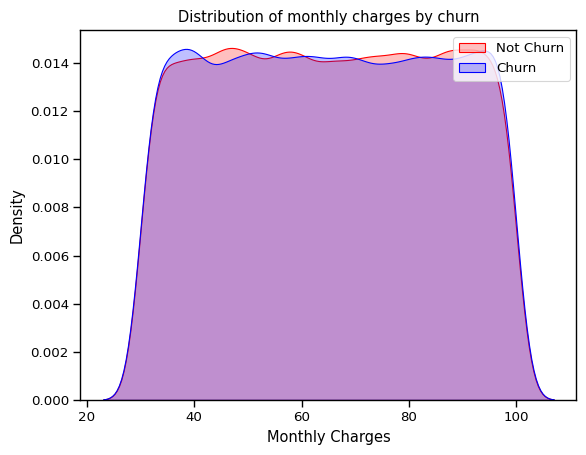

In [228]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

# Equal Distribution of higher mothly bill w.r.t. Churn

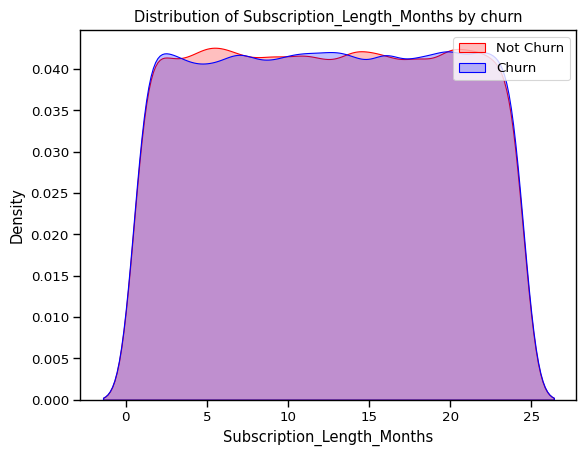

In [229]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Subscription_Length_Months[(df["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Subscription_Length_Months[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Subscription_Length_Months');
ax.set_title('Distribution of Subscription_Length_Months by churn');

# Equal Distribution of higher Subscription_Length_Months w.r.t. Churn

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

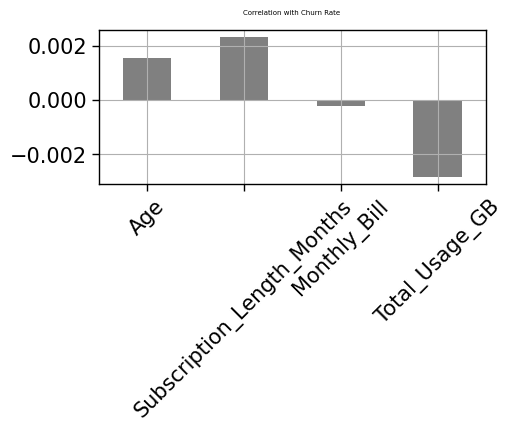

In [230]:
data2 = df[['Age',	'Subscription_Length_Months',	'Monthly_Bill',	'Total_Usage_GB'	]]

correlations = data2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (5, 2),
        fontsize = 15,
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "5", fontfamily = "sans-serif")

In [231]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

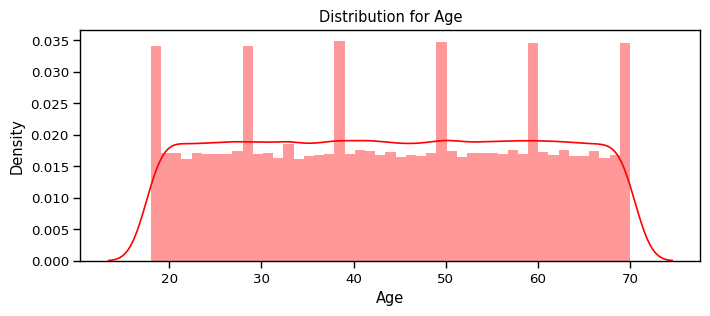

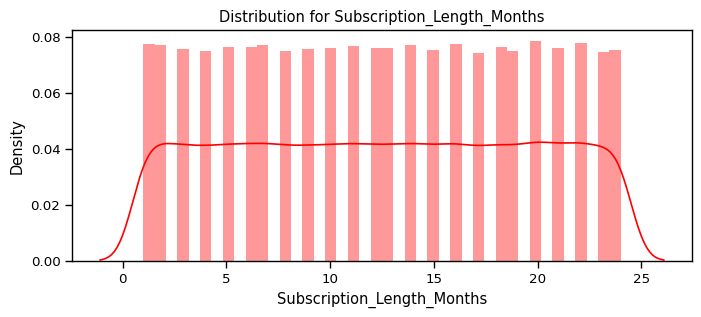

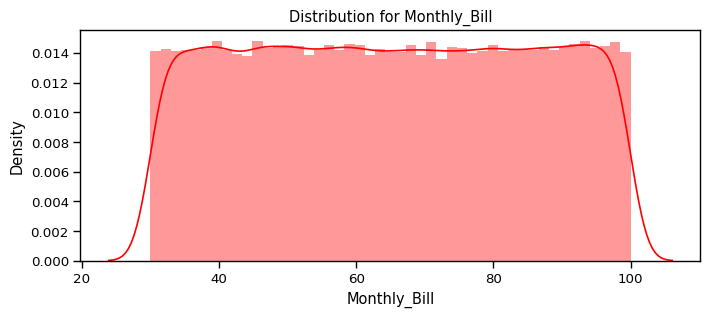

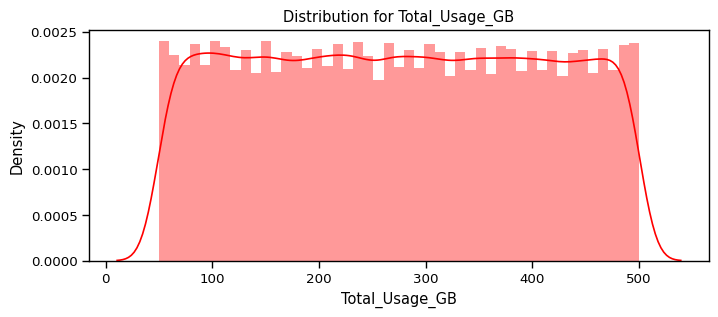

In [232]:
col =  ["Age", 'Subscription_Length_Months', 'Monthly_Bill','Total_Usage_GB']
for features in col :distplot(features, df)

<Axes: ylabel='Frequency'>

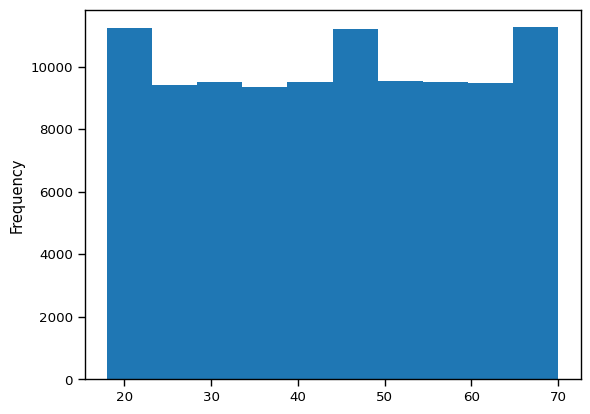

In [233]:
#Histogram: frequency count chart
#I approach
df['Age'].plot(kind='hist',bins=10)

<Axes: ylabel='Frequency'>

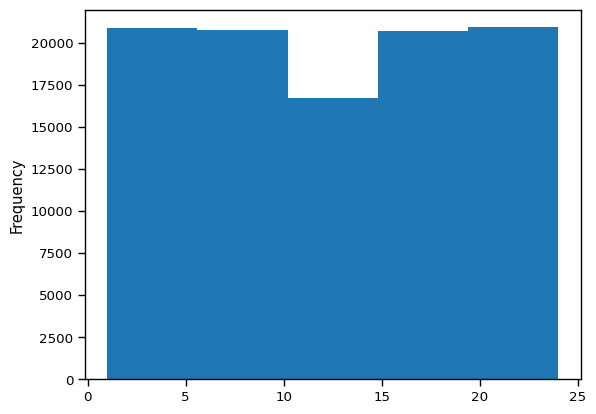

In [234]:
df['Subscription_Length_Months'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

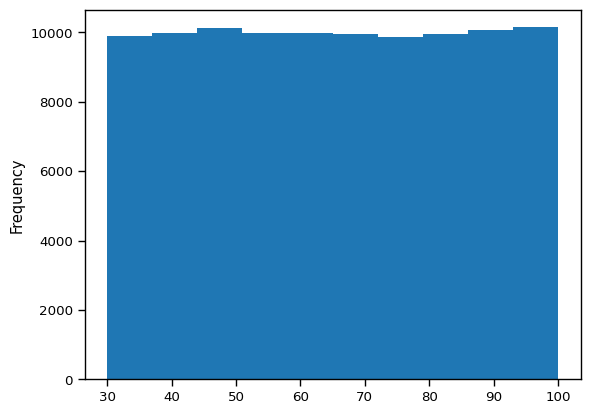

In [235]:
df['Monthly_Bill'].plot(kind='hist',bins=10)

<Axes: ylabel='Frequency'>

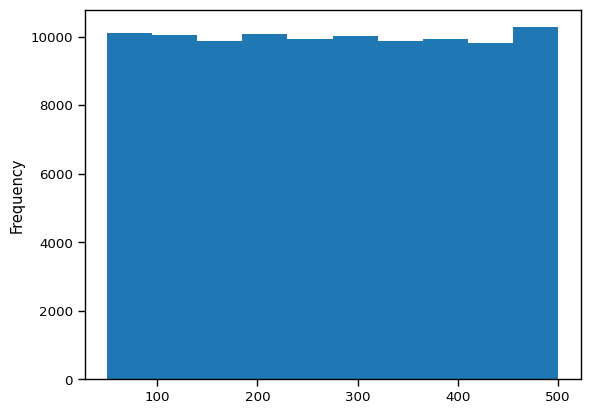

In [236]:
df['Total_Usage_GB'].plot(kind='hist',bins=10)

In [237]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

<Axes: ylabel='count'>

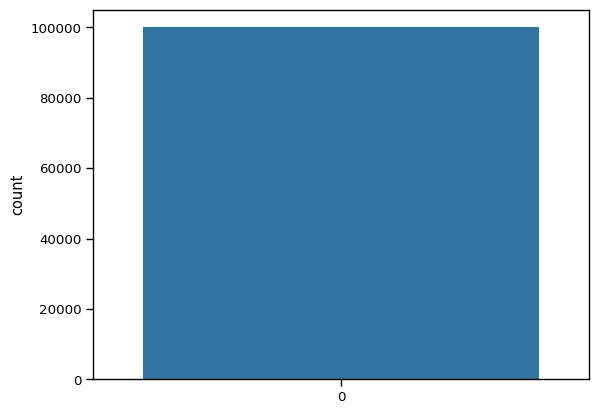

In [238]:
sns.countplot(df['Churn'])

**50% stayed 50% left**

In [239]:
col=df.columns

In [240]:
col

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

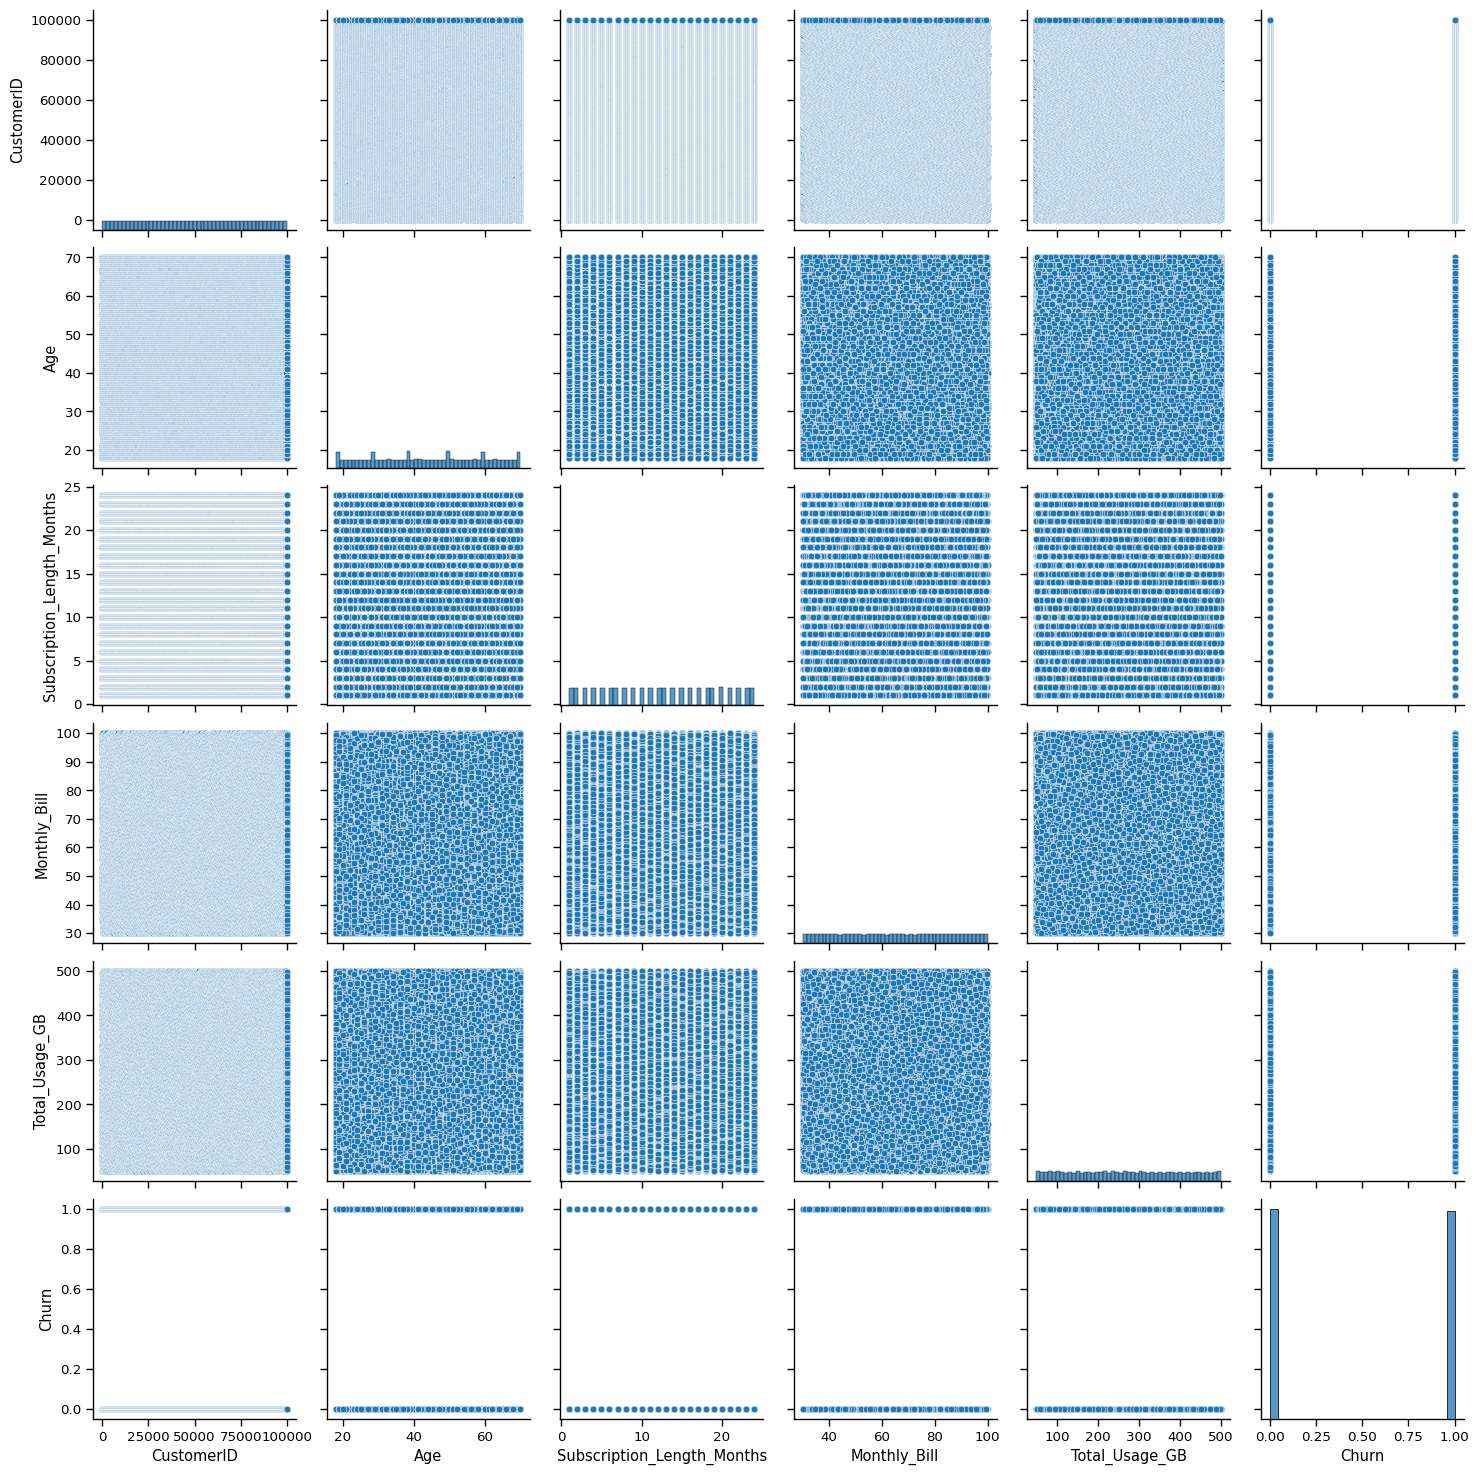

In [241]:
sns.pairplot(df)

> 1.CLEAN THE DATA | REPLACE| IMPUTE
# DATA PREPROCESSING:

>1.Encoding categorical data

>2.Spliting dataset into features and outcomes

>3.feature scaling







# **ENCODING- LabelEncoder**

In [242]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [243]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
sc=StandardScaler()

In [244]:
# fit and transform the data
# we have to read data from columns and overwrite on same column

df.Gender= le.fit_transform(df.Gender)

df.Location= le.fit_transform(df.Location)



CHECK: df.dtypes while Label Encoding


In [245]:
df.dtypes#TotalCharges converts from object to int 64

CustomerID                      int64
Name                           object
Age                             int64
Gender                          int64
Location                        int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [246]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,2,17,73.36,236,0
1,2,Customer_2,62,0,4,1,48.76,172,0
2,3,Customer_3,24,0,2,5,85.47,460,0
3,4,Customer_4,36,0,3,3,97.94,297,1
4,5,Customer_5,46,0,3,19,58.14,266,0
5,6,Customer_6,67,1,4,15,82.65,456,1
6,7,Customer_7,30,0,0,3,73.79,269,0
7,8,Customer_8,67,0,3,1,97.70,396,1
8,9,Customer_9,20,0,3,10,42.45,150,1
9,10,Customer_10,53,0,2,12,64.49,383,1


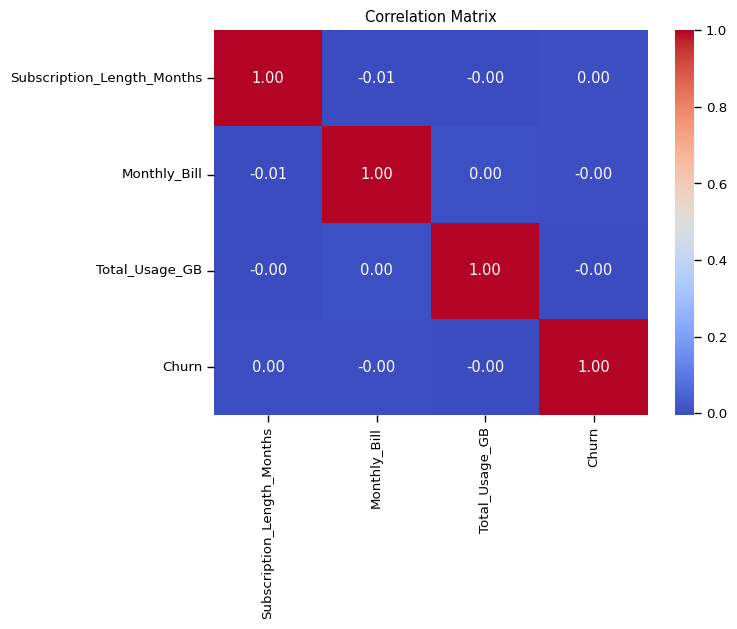

In [247]:
newdf=df.iloc[:,5:]
correlation_matrix = newdf.corr()
#1 or -1 is best 0 is worst
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()






# Perform feature engineering

In [248]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, float('inf')], labels=['Young', 'Middle-aged', 'Elderly'])

# location_dummies = pd.get_dummies(df['Location'], prefix='Location')
# df = pd.concat([df, location_dummies], axis=1)

df['Subscription_Cost'] = df['Monthly_Bill'] / df['Subscription_Length_Months']


In [249]:

df['SeniorCitizen'] =( df['Age'] >=60)

In [250]:
df.SeniorCitizen=le.fit_transform(df['SeniorCitizen'])
df.SeniorCitizen=sc.fit_transform(df[['SeniorCitizen']])

In [251]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Cost,SeniorCitizen
0,1,Customer_1,63,1,2,17,73.36,236,0,Elderly,4.315294,1.956141
1,2,Customer_2,62,0,4,1,48.76,172,0,Elderly,48.760000,1.956141
2,3,Customer_3,24,0,2,5,85.47,460,0,Young,17.094000,-0.511211
3,4,Customer_4,36,0,3,3,97.94,297,1,Middle-aged,32.646667,-0.511211
4,5,Customer_5,46,0,3,19,58.14,266,0,Middle-aged,3.060000,-0.511211


## **Divide the dataset into features and outcome**

In [252]:
#x-features
#y-target/outcome
x = pd.DataFrame({'Gender':df['Gender'],'Age_Group':df['Age_Group'], 'Subscription_Cost': df['Subscription_Cost'],'Monthly_Bill': df['Monthly_Bill'],'Total_Usage_GB': df['Total_Usage_GB'],'SeniorCitizen':df['SeniorCitizen']})
#iloc divide the dataset using indexes
y=df['Churn']

In [253]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Cost,SeniorCitizen
0,1,Customer_1,63,1,2,17,73.36,236,0,Elderly,4.315294,1.956141
1,2,Customer_2,62,0,4,1,48.76,172,0,Elderly,48.760000,1.956141
2,3,Customer_3,24,0,2,5,85.47,460,0,Young,17.094000,-0.511211
3,4,Customer_4,36,0,3,3,97.94,297,1,Middle-aged,32.646667,-0.511211
4,5,Customer_5,46,0,3,19,58.14,266,0,Middle-aged,3.060000,-0.511211


In [254]:
x.head()

,Gender,Age_Group,Subscription_Cost,Monthly_Bill,Total_Usage_GB,SeniorCitizen
0,1,Elderly,4.315294,73.36,236,1.956141
1,0,Elderly,48.760000,48.76,172,1.956141
2,0,Young,17.094000,85.47,460,-0.511211
3,0,Middle-aged,32.646667,97.94,297,-0.511211
4,0,Middle-aged,3.060000,58.14,266,-0.511211


<Axes: xlabel='Age_Group', ylabel='count'>

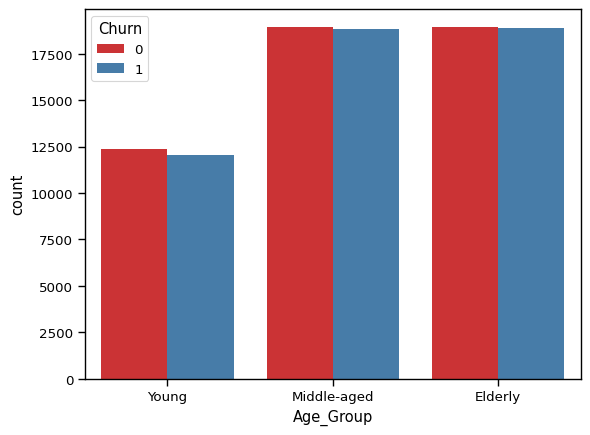

In [255]:
sns.countplot(data=df, x='Age_Group', hue='Churn', palette='Set1')


<Axes: xlabel='Age_Group', ylabel='count'>

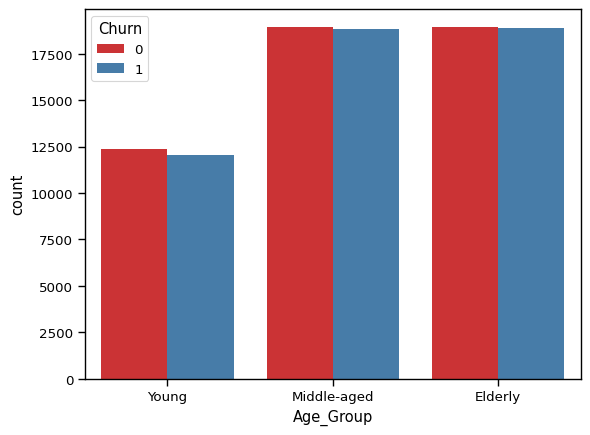

In [256]:
sns.countplot(data=df, x='Age_Group', hue='Churn', palette='Set1')


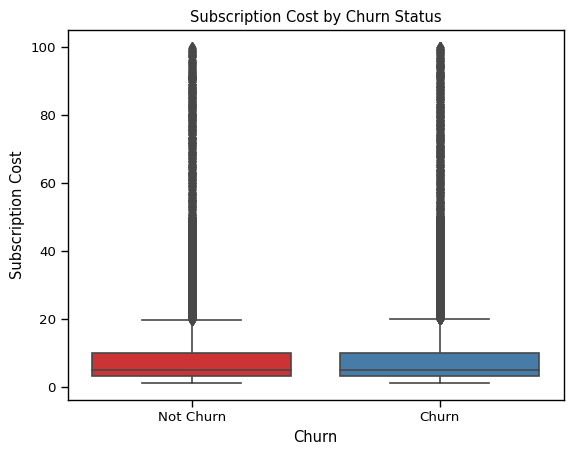

In [257]:
sns.boxplot(data=df, x='Churn', y='Subscription_Cost', palette='Set1')
# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Subscription Cost')
plt.title('Subscription Cost by Churn Status')

# Show the plot
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()

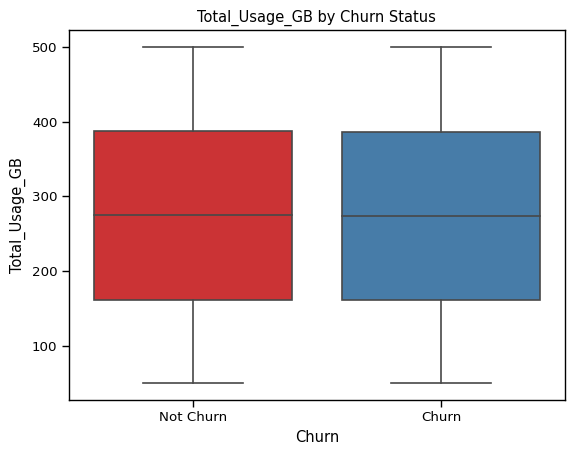

In [258]:
sns.boxplot(data=df, x='Churn', y='Total_Usage_GB', palette='Set1')
# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Total_Usage_GB')
plt.title('Total_Usage_GB by Churn Status')

# Show the plot
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='count'>

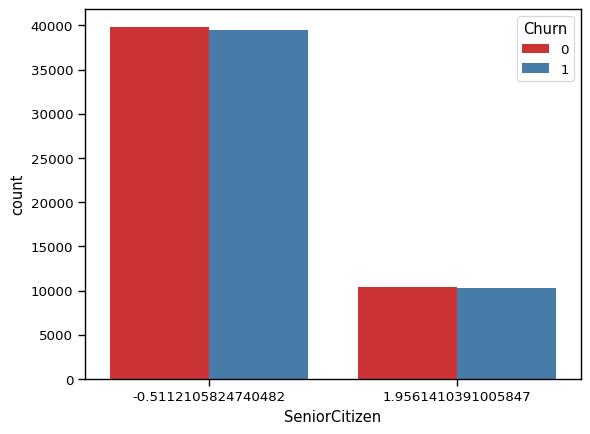

In [259]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set1')


In [260]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [261]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Cost,SeniorCitizen
0,1,Customer_1,63,1,2,17,73.36,236,0,Elderly,4.315294,1.956141
1,2,Customer_2,62,0,4,1,48.76,172,0,Elderly,48.760000,1.956141
2,3,Customer_3,24,0,2,5,85.47,460,0,Young,17.094000,-0.511211
3,4,Customer_4,36,0,3,3,97.94,297,1,Middle-aged,32.646667,-0.511211
4,5,Customer_5,46,0,3,19,58.14,266,0,Middle-aged,3.060000,-0.511211


## **Data Normalization**- MinMaxScaler StandardScaler

In [262]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
le=LabelEncoder()
ms=MinMaxScaler()
ss=StandardScaler()

In [263]:
df.Gender=le.fit_transform(df['Gender'])
df.Location=le.fit_transform(df['Location'])
df.Age_Group=le.fit_transform(df['Age_Group'])

In [264]:
df.Subscription_Cost=ss.fit_transform(df[['Subscription_Cost']])
df.Subscription_Length_Months=ss.fit_transform(df[['Subscription_Length_Months']])
df.Monthly_Bill=ss.fit_transform(df[['Monthly_Bill']])
df.Total_Usage_GB=ss.fit_transform(df[['Total_Usage_GB']])

In [265]:
# df.Age=ms.fit_transform(df[['Age']])
# df.Subscription_Length_Months=ss.fit_transform(df[['Subscription_Length_Months']])
# df.Monthly_Bill=ss.fit_transform(df[['Monthly_Bill']])
# df.Total_Usage_GB=ss.fit_transform(df[['Total_Usage_GB']])


In [266]:
# df.Subscription_Length_Months = pd.DataFrame(A, columns=['Age'])
# df.Subscription_Length_Months = pd.DataFrame(SLM, columns=['Subscription_Length_Months'])
# df.Monthly_Bill = pd.DataFrame(MB, columns=['Monthly_Bill'])
# df.Total_Usage_GB = pd.DataFrame(TUGB, columns=['Total_Usage_GB'])

In [267]:
# x = pd.DataFrame({ 'Subscription_Cost':df['Subscription_Cost'],'Subscription_Length_Months': df['Subscription_Length_Months'],'Monthly_Bill': df['Monthly_Bill'],'Total_Usage_GB': df['Total_Usage_GB'],'SeniorCitizen':df['SeniorCitizen']})
x = pd.DataFrame({ 'Subscription_Cost':df['Subscription_Cost'],'Total_Usage_GB': df['Total_Usage_GB'],'SeniorCitizen':df['SeniorCitizen']})

In [268]:
x.head()

,Subscription_Cost,Total_Usage_GB,SeniorCitizen
0,-0.413328,-0.294289,1.956141
1,2.650731,-0.784852,1.956141
2,0.467648,1.422681,-0.511211
3,1.539863,0.173279,-0.511211
4,-0.499869,-0.064338,-0.511211


In [269]:
ynew=pd.DataFrame({'Churn':df['Churn']})

## **DIVIDE THE DATA INTO train test split**

In [270]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,ynew,test_size=.05,random_state=10)

In [271]:
x_test

,Subscription_Cost,Total_Usage_GB,SeniorCitizen
33226,-0.445233,-0.769522,1.956141
64804,2.677618,0.817142,-0.511211
39763,-0.366506,-1.405720,-0.511211
51270,-0.533230,0.863133,-0.511211
9698,-0.299251,0.219269,1.956141
...,...,...,...
83522,0.744860,-0.815512,-0.511211
94118,-0.434754,-1.543691,-0.511211
34725,0.148176,1.445676,-0.511211
48336,-0.455884,-0.332614,-0.511211


In [272]:
y_test

,Churn
33226,0
64804,0
39763,1
51270,1
9698,0
...,...
83522,1
94118,0
34725,1
48336,0


In [273]:
x_train

,Subscription_Cost,Total_Usage_GB,SeniorCitizen
37703,-0.469075,-0.094998,-0.511211
1749,-0.467204,0.127288,-0.511211
35211,0.852752,0.801812,1.956141
68305,-0.213817,-0.148653,-0.511211
92097,-0.304723,0.571861,-0.511211
...,...,...,...
9372,-0.365477,1.139074,-0.511211
93553,-0.573935,-1.704657,-0.511211
50496,-0.537750,0.932118,-0.511211
94735,-0.104837,1.231055,-0.511211


In [274]:
y_train.head()

,Churn
37703,1
1749,0
35211,0
68305,0
92097,1


In [275]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)


In [276]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [277]:
pred=model.predict(x_test)
pred

array([0, 0, 1, ..., 0, 0, 1])

In [278]:
#  NOW  to do **side by side comparision**
# for this **create a copy of testing feature **

In [279]:
result=x_test.copy()
result

,Subscription_Cost,Total_Usage_GB,SeniorCitizen
33226,-0.445233,-0.769522,1.956141
64804,2.677618,0.817142,-0.511211
39763,-0.366506,-1.405720,-0.511211
51270,-0.533230,0.863133,-0.511211
9698,-0.299251,0.219269,1.956141
...,...,...,...
83522,0.744860,-0.815512,-0.511211
94118,-0.434754,-1.543691,-0.511211
34725,0.148176,1.445676,-0.511211
48336,-0.455884,-0.332614,-0.511211


In [280]:
# we need to add 2 columns || Actual || Prediction
result['Actual'] = y_test
result['Prediction'] = pred

In [281]:
result['Prediction'].head(15)

33226    0
64804    0
39763    1
51270    0
9698     1
5948     0
27955    0
55001    0
50875    1
47755    0
29430    0
32953    1
6808     1
32927    1
64298    0
Name: Prediction, dtype: int64

In [282]:
result.head(20)

,Subscription_Cost,Total_Usage_GB,SeniorCitizen,Actual,Prediction
33226,-0.445233,-0.769522,1.956141,0,0
64804,2.677618,0.817142,-0.511211,0,0
39763,-0.366506,-1.405720,-0.511211,1,1
51270,-0.533230,0.863133,-0.511211,1,0
9698,-0.299251,0.219269,1.956141,0,1
5948,2.990610,-0.301954,-0.511211,0,0
27955,-0.592699,1.131409,-0.511211,1,0
55001,-0.338706,-0.309619,-0.511211,1,0
50875,-0.396162,-0.999473,-0.511211,1,1
47755,-0.410092,-0.049008,1.956141,0,0


# MODEL PREDICTION
confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [283]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [284]:
confusion_matrix(y_test,pred)

array([[1314, 1256],
       [1204, 1226]])

In [285]:
print("precision_score: ",precision_score(y_test,pred))

precision_score:  0.4939564867042707


In [286]:
print("recall_score: ",recall_score(y_test,pred))

recall_score:  0.5045267489711934


In [287]:
print("f1_score: ",f1_score(y_test,pred))

f1_score:  0.499185667752443


In [288]:
print("accuracy_score: ",accuracy_score(y_test,pred))

accuracy_score:  0.508


In [289]:
print("Acurracy of the model: ",accuracy_score(y_test,pred)*100,"%")

Acurracy of the model:  50.8 %


# **Conclusion: The model is 50% Accurate.**

---


-**Dimple Kundu**

In [290]:
ts=[0.5,.4,.3,.2,.1]
acc=[]#one empty list for storing accuracy score
for i in ts:
    x_train1,x_test1, y_train1 , y_test1 = train_test_split(x,y,test_size= i, random_state = 20)
    model1=RandomForestClassifier()
    model1.fit(x_train1,y_train1)
    pred1=model1.predict(x_test1)
    acc.append(round(accuracy_score(y_test1,pred1)*100))
print(acc)

[50, 50, 50, 50, 50]
